# <span style = "color:#012030">Online Shop Sales Data Analysis </span>
 
## <span style = "color:#012030">Author</span> :<span style = "color:#2C3333">Thapelo Maloka (217004340)</span>
## <span style = "color:#012030">Due Date</span> :<span style = "color:#2C3333">14 April 2023</span>
## <span style = "color:#012030">Data Source</span> :<span style = "color:#38D0F2">https://www.kaggle.com/datasets/onlineretailshop/online-shop-customer-sales-data</span>

## <span style = "color:#012030">GitHub Link</span> :<span style = "color:#2C3333">https://github.com/thapelomaloka/Data-Project</span>



 
 



# <span style = "color:#2C3333">Import Relevant Libraries</span>

In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <span style = "color:#2C3333">Import My Data File In the Format of CSV</span>

In [478]:
# Read the CSV file into a DataFrame.
sales_data = pd.read_csv('./Online_Shop_Customer_Sales_Data.csv')

## <span style = "color:#2C3333">View the 1st twenty rows of the data to see if it Importaed succesfully</span>

In [479]:
sales_data.head(20)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0
5,504313,55,0,13.7,6,14.05.21,12.467,1,364,1,0,0
6,504314,17,1,30.7,6,09.01.21,2.456,0,654,0,0,0
7,504315,30,1,8.1,7,28.03.21,6.561,3,1011,0,0,0
8,504316,51,0,18.0,4,04.08.21,11.880,0,312,3,1,0
9,504317,63,1,19.2,4,06.10.21,11.904,3,828,0,0,0


# <span style = "color:#2C3333">Data Cleaning</span>

### <span style = "color:#2C3333">Check for Missing Values</span>

In [480]:
# Check for missing values
missing_values = sales_data.isna()

# Count the number of missing values in each column
num_missing = missing_values.sum()

# Print the number of missing values in each column
print(num_missing)

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64


### <span style = "color:#2C3333">For each row it appears that there are no missing vaues</span>
### <span style = "color:#2C3333">Check for data types</span>


In [481]:
sales_data.dtypes

Customer_id         int64
Age                 int64
Gender              int64
Revenue_Total     float64
N_Purchases         int64
Purchase_DATE      object
Purchase_VALUE    float64
Pay_Method          int64
Time_Spent          int64
Browser             int64
Newsletter          int64
Voucher             int64
dtype: object

## <span style = "color:#2C3333">Replace 0 with 'Male' and 1 with 'Female' in the Gender column</span> 
## <span style = "color:#2C3333">Replace 0 with Chrome, 1 with Safari, 2 with Edge, 3 with Other in the Browser column</span>
## <span style = "color:#2C3333">Replace 0 with Digital Wallets, 1 with Card, 2 with PayPal, 3 with Other in the Pay Method column</span>
## <span style = "color:#2C3333">Replace 0 with not subscribed, 1 with subscribed in the Newsletter column</span>
## <span style = "color:#2C3333">Replace 0 with not used, 1 with used in the Voucher column</span>


In [482]:
sales_data['Gender'] = sales_data['Gender'].replace({0: 'Male', 1: 'Female'})

# Replace values in the Browser column
sales_data['Browser'] = sales_data['Browser'].replace({0: 'Chrome', 1: 'Safari', 2: 'Edge', 3: 'Other'})

# Replace values in the Pay Method column
sales_data['Pay_Method'] = sales_data['Pay_Method'].replace({0: 'Digital Wallets', 1: 'Card', 2: 'PayPal', 3: 'Other'})

# Replace values in the Newsletter column
sales_data['Newsletter'] = sales_data['Newsletter'].replace({0: 'not subscribed', 1: 'subscribed'})

# Replace values in the Voucher column
sales_data['Voucher'] = sales_data['Voucher'].replace({0: 'not used', 1: 'used'})


sales_data.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,Male,45.3,2,22.06.21,24.915,Card,885,Chrome,not subscribed,not used
1,504309,18,Female,36.2,3,10.12.21,2.896,PayPal,656,Chrome,not subscribed,used
2,504310,52,Female,10.6,1,14.03.21,10.600,Digital Wallets,761,Chrome,subscribed,not used
3,504311,29,Male,54.1,5,25.10.21,43.280,Card,906,Chrome,subscribed,not used
4,504312,21,Female,56.9,1,14.09.21,56.900,Card,605,Chrome,subscribed,not used


## <span style = "color:#2C3333"> Create a new Column with the Month only and the year only and display the last 2 digits from the Purchase_DATE column</span> 


In [483]:
sales_data['Month'] = sales_data['Purchase_DATE'].str[3:5]
sales_data['Year'] = sales_data['Purchase_DATE'].str[6:8]

sales_data.head()


,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Month,Year
0,504308,53,Male,45.3,2,22.06.21,24.915,Card,885,Chrome,not subscribed,not used,06,21
1,504309,18,Female,36.2,3,10.12.21,2.896,PayPal,656,Chrome,not subscribed,used,12,21
2,504310,52,Female,10.6,1,14.03.21,10.600,Digital Wallets,761,Chrome,subscribed,not used,03,21
3,504311,29,Male,54.1,5,25.10.21,43.280,Card,906,Chrome,subscribed,not used,10,21
4,504312,21,Female,56.9,1,14.09.21,56.900,Card,605,Chrome,subscribed,not used,09,21


## <span style = "color:#2C3333"> Convert the new Column Month and Year into an Interger </span>


In [484]:
sales_data['Month'].astype(int)
sales_data['Year'].astype(int)

0        21
1        21
2        21
3        21
4        21
         ..
65791    21
65792    21
65793    21
65794    21
65795    21
Name: Year, Length: 65796, dtype: int32

## <span style = "color:#2C3333">Rename the the N_Purchases to Number_Purchases & Time_Spent to Time_Spent(Sec) Column</span> 


In [485]:
sales_data.rename(columns = {'Time_Spent' : 'Time_Spent(Sec)', 'N_Purchases' : 'Number_Purchases'},inplace = True) 
sales_data.head()

,Customer_id,Age,Gender,Revenue_Total,Number_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent(Sec),Browser,Newsletter,Voucher,Month,Year
0,504308,53,Male,45.3,2,22.06.21,24.915,Card,885,Chrome,not subscribed,not used,06,21
1,504309,18,Female,36.2,3,10.12.21,2.896,PayPal,656,Chrome,not subscribed,used,12,21
2,504310,52,Female,10.6,1,14.03.21,10.600,Digital Wallets,761,Chrome,subscribed,not used,03,21
3,504311,29,Male,54.1,5,25.10.21,43.280,Card,906,Chrome,subscribed,not used,10,21
4,504312,21,Female,56.9,1,14.09.21,56.900,Card,605,Chrome,subscribed,not used,09,21


# <span style = "color:#2C3333"> Drop the Customer Id Column </span>

In [486]:
# Make a copy of the dataframe
sales_data_copy = sales_data.copy()

# Drop the 'column_name' column from the original dataframe
sales_data_copy.drop("Customer_id", axis=1, inplace =True)

In [487]:
sales_data_copy.head()

,Age,Gender,Revenue_Total,Number_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent(Sec),Browser,Newsletter,Voucher,Month,Year
0,53,Male,45.3,2,22.06.21,24.915,Card,885,Chrome,not subscribed,not used,06,21
1,18,Female,36.2,3,10.12.21,2.896,PayPal,656,Chrome,not subscribed,used,12,21
2,52,Female,10.6,1,14.03.21,10.600,Digital Wallets,761,Chrome,subscribed,not used,03,21
3,29,Male,54.1,5,25.10.21,43.280,Card,906,Chrome,subscribed,not used,10,21
4,21,Female,56.9,1,14.09.21,56.900,Card,605,Chrome,subscribed,not used,09,21


# <span style = "color:#2C3333"> Save the cleaned data to a new csv file. </span>

In [488]:
sales_data_copy.to_csv('Sales_Data_Final.csv', index=False)

# <span style = "color:#2C3333">Read In the New Cleaned Data that is Edited to work with. </span>

In [489]:
sales_clean_data = pd.read_csv('./Sales_Data_Final.csv')
sales_clean_data.head()


,Age,Gender,Revenue_Total,Number_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent(Sec),Browser,Newsletter,Voucher,Month,Year
0,53,Male,45.3,2,22.06.21,24.915,Card,885,Chrome,not subscribed,not used,6,21
1,18,Female,36.2,3,10.12.21,2.896,PayPal,656,Chrome,not subscribed,used,12,21
2,52,Female,10.6,1,14.03.21,10.600,Digital Wallets,761,Chrome,subscribed,not used,3,21
3,29,Male,54.1,5,25.10.21,43.280,Card,906,Chrome,subscribed,not used,10,21
4,21,Female,56.9,1,14.09.21,56.900,Card,605,Chrome,subscribed,not used,9,21


# <span style = "color:#2C3333">Get summary statistics of the data.</span>

In [490]:
sales_clean_data.describe()

,Age,Revenue_Total,Number_Purchases,Purchase_VALUE,Time_Spent(Sec),Month,Year
count,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000
mean,39.592696,27.732935,3.992477,15.968699,598.925603,6.531415,21.002690
std,13.825466,14.941878,2.004370,13.229295,277.833635,3.459452,0.051797
min,16.000000,0.500000,1.000000,0.005000,120.000000,1.000000,21.000000
25%,28.000000,15.300000,2.000000,4.819750,358.000000,4.000000,21.000000
50%,40.000000,30.100000,4.000000,12.640000,598.000000,7.000000,21.000000
75%,51.000000,37.600000,6.000000,24.752000,840.000000,10.000000,21.000000
max,63.000000,59.900000,7.000000,59.900000,1080.000000,12.000000,22.000000


## <span style = "color:#2C3333">Check for any Duplicates</span>

In [491]:
sales_clean_data.duplicated().sum()


0

## <span style = "color:#2C3333">There are no missing values and duplicates so the data seems clear so far.</span>

# <span style = "color:#2C3333">Descriptive Statistics. </span>

## <span style = "color:#2C3333">Age: calculate the mean, median, mode, minimum, maximum,standard deviation and Inter Quartile Rage of the age of customers.</span>

In [492]:
#Sort the Age column from low to high
SortAge = sales_clean_data.sort_values(by="Age")
print(SortAge['Age'].describe())
print('Median: ',SortAge['Age'].median())

count    65796.000000
mean        39.592696
std         13.825466
min         16.000000
25%         28.000000
50%         40.000000
75%         51.000000
max         63.000000
Name: Age, dtype: float64
Median:  40.0


## <span style = "color:#2C3333"> Mode and IQR of Age.</span>

In [493]:
#The mode of the Age:
Mode = SortAge['Age'].mode()[0]
print('Mode:', Mode)

#The Inter Quartile Range of the Age:
Q1 = SortAge['Age'].quantile(0.25)
Q3 = SortAge['Age'].quantile(0.75)

IQR = Q3 - Q1

print('IQR:', IQR)

Mode: 50
IQR: 23.0


## <span style = "color:#2C3333"> Gender: count the number of customers for each gender, calculate the percentage of male and female customers (Distribution).</span>

In [494]:
CountMale = 0
CountFemale = 0

for i in sales_clean_data['Gender']:
    if(i == 'Male'):
        CountMale = CountMale +1
    else:
        CountFemale = CountFemale +1
        
print('The total number of Males is: ', CountMale)
print('The total number of Females is: ', CountFemale)

#Calculate the percentage of Male and Female customers
total_no_cus = CountFemale + CountMale
percentage_males = (CountMale / total_no_cus) * 100
percentage_females = (CountFemale / total_no_cus) * 100

print('The percentage of Female customers is: ',percentage_females,"%")
print('The percentage of Male customers is: ',percentage_males,"%")

The total number of Males is:  21624
The total number of Females is:  44172
The percentage of Female customers is:  67.13478022980121 %
The percentage of Male customers is:  32.86521977019879 %


### <span style = "color:#2C3333">Pie Chart to Show distribution of Male and Females.</span>

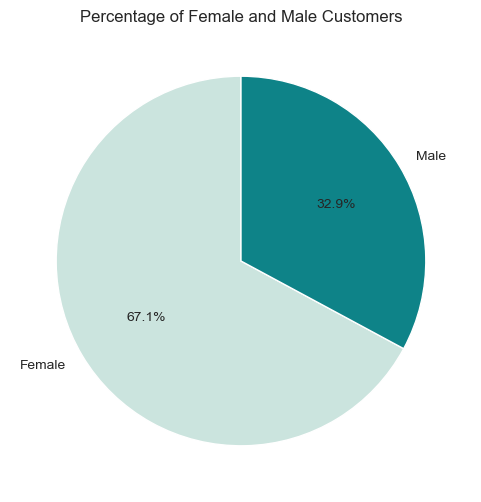

In [495]:
# create data
labels = ['Female', 'Male']
sizes = [percentage_females, percentage_males]

# Create a pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#CBE4DE', '#0E8388'])
plt.title('Percentage of Female and Male Customers')
plt.show()

In [496]:
import seaborn as sns
import matplotlib.pyplot as plt

### <span style = "color:#2C3333">Calculate the Absolute value of Age.</span>

In [497]:
age_abs = SortAge['Age'].abs()[0]
print("Absolute Value of Age: ", age_abs)

Absolute Value of Age:  53


In [498]:
sales_clean_data.sort_values(by='Month')


,Age,Gender,Revenue_Total,Number_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent(Sec),Browser,Newsletter,Voucher,Month,Year
34554,58,Female,30.1,2,26.01.21,23.177,Other,846,Chrome,not subscribed,not used,1,21
5094,27,Female,8.3,3,10.01.21,6.308,Digital Wallets,244,Chrome,not subscribed,not used,1,21
12322,36,Female,36.4,4,06.01.21,26.936,PayPal,759,Safari,not subscribed,not used,1,21
43306,41,Female,11.4,2,29.01.21,9.120,Digital Wallets,907,Safari,subscribed,not used,1,21
29911,30,Female,12.9,1,26.01.21,12.900,Other,329,Safari,not subscribed,not used,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917,51,Female,27.8,7,25.12.21,7.506,Other,667,Edge,subscribed,not used,12,21
31474,31,Female,13.9,6,30.12.21,5.421,Digital Wallets,1001,Safari,not subscribed,used,12,21
9921,27,Female,29.0,7,24.12.21,10.730,PayPal,856,Safari,not subscribed,not used,12,21
59405,19,Female,38.9,3,22.12.21,22.951,PayPal,300,Chrome,subscribed,used,12,21


# <span style = "color:#2C3333">Calculate the frequency distribution of the "Browser" column. </span>

In [499]:
# Calculate the frequency distribution of the "Browser" column
freq_dist = sales_clean_data["Browser"].value_counts()

# Print the frequency distribution
print(freq_dist)

Chrome    42076
Safari    13135
Other      7208
Edge       3377
Name: Browser, dtype: int64


# <span style = "color:#2C3333">Boxplot visualization</span>

<Axes: >

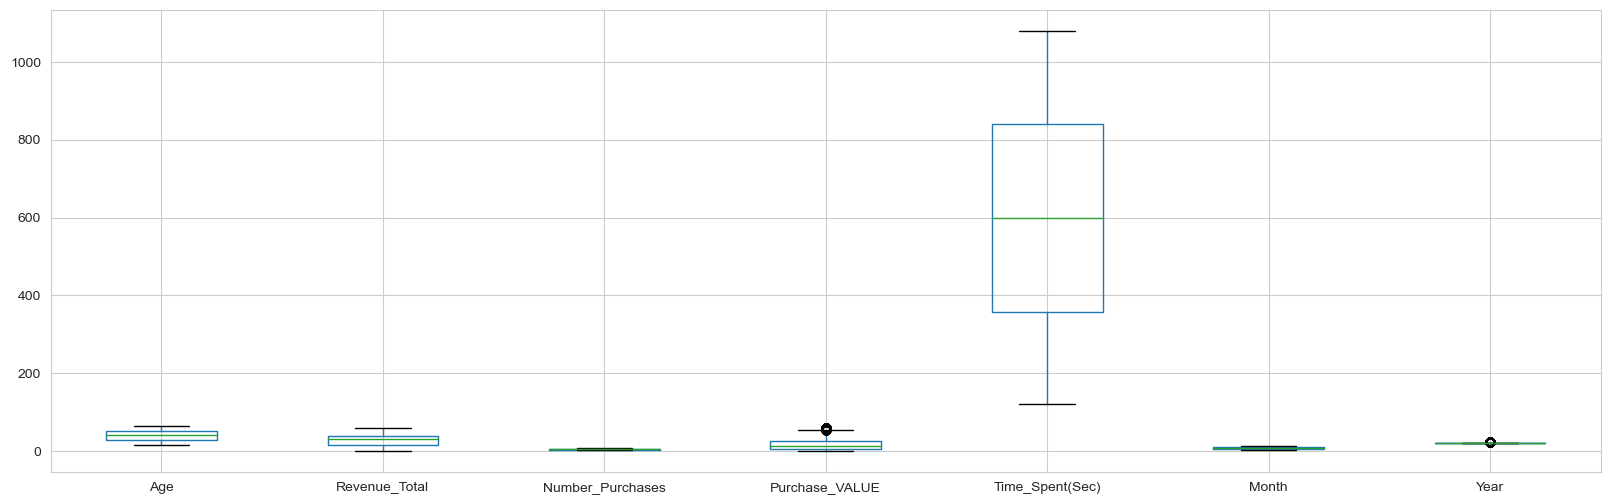

In [500]:
sales_clean_data.boxplot(figsize = (20,6))

 # <span style = "color:#2C3333">Outliers in the 'Purchase_VALUE' column</span>

In [501]:
from scipy.stats import iqr
IQR = iqr(sales_clean_data["Purchase_VALUE"])
lower_threshold = np.quantile(sales_clean_data["Purchase_VALUE"], 0.25) - 1.5 * IQR
upper_threshold = np.quantile(sales_clean_data["Purchase_VALUE"], 0.75) + 1.5 * IQR
T_outliers = sales_clean_data[(sales_clean_data["Purchase_VALUE"] < lower_threshold) | (sales_clean_data["Purchase_VALUE"] > upper_threshold)]
T_outliers

,Age,Gender,Revenue_Total,Number_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent(Sec),Browser,Newsletter,Voucher,Month,Year
4,21,Female,56.9,1,14.09.21,56.900,Card,605,Chrome,subscribed,not used,9,21
73,34,Female,58.7,7,22.01.21,58.113,Card,338,Other,not subscribed,not used,1,21
224,56,Female,54.9,1,07.08.21,54.900,Card,723,Other,not subscribed,not used,8,21
298,62,Female,58.7,1,25.09.21,58.700,Card,1065,Safari,not subscribed,not used,9,21
617,61,Female,59.7,1,31.12.21,59.700,PayPal,391,Chrome,not subscribed,not used,12,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65247,25,Female,59.1,1,06.12.21,59.100,Card,297,Chrome,not subscribed,not used,12,21
65383,46,Female,59.7,3,16.10.21,56.118,Other,490,Edge,not subscribed,not used,10,21
65587,18,Female,58.3,7,28.11.21,55.385,Digital Wallets,548,Chrome,not subscribed,not used,11,21
65610,48,Male,59.3,1,25.03.21,59.300,Digital Wallets,485,Chrome,not subscribed,not used,3,21


# <span style = "color:#2C3333"> Explore columns with qualitative (categorical) data: </span>

In [502]:
#Descriptive statistics for non numerical data (qualitative)
sales_clean_data.describe(include=['object'])

,Gender,Purchase_DATE,Pay_Method,Browser,Newsletter,Voucher
count,65796,65796,65796,65796,65796,65796
unique,2,366,4,4,2,2
top,Female,31.03.21,Card,Chrome,not subscribed,not used
freq,44172,224,19754,42076,55859,49330


# <span style = "color:#2C3333"> Questions to provide Insights about my data Alongside Data Visiulization </span>

## <span style = "color:#2C3333"> What is the average revenue total for Female and Male customers in this dataset? </span>

In [503]:
#group the data by Female Customers and calculate the sum of the revenue.
female_total_revenue = sales_clean_data[sales_clean_data['Gender'] == 'Female']['Revenue_Total'].sum()
#group the data by Female Customers and calculate the sum of the revenue.
male_total_revenue = sales_clean_data[sales_clean_data['Gender'] == 'Male']['Revenue_Total'].sum()

#print the monthly revenue totals
female_average = female_total_revenue/CountFemale
male_average = male_total_revenue/CountMale

print('The average revenue total for female customers is:',female_average)
print('The average revenue total for male customers is:',male_average)

The average revenue total for female customers is: 27.722419179570768
The average revenue total for male customers is: 27.75441638919719


* The average revenue generated by female customers is 27.72, while the average revenue generated by male customers is 27.75.
* There is not a significant difference in the average revenue generated by male and female customers.
* This suggests that both genders are equally valuable to the business in terms of generating revenue.

## <span style = "color:#2C3333"> Which pay method is most commonly used by customers in this dataset? </span>

In [504]:
#find the unique values in the 'Pay_Method' column
sales_clean_data['Pay_Method'].unique()

array(['Card', 'PayPal', 'Digital Wallets', 'Other'], dtype=object)

In [505]:
Card = 0
PayPal = 0
Digital_Wallets = 0
Other = 0

for i in sales_clean_data['Pay_Method']:
    if(i == 'Card'):
        Card += 1
    elif (i == 'PayPal'):
            PayPal += 1
    elif (i == 'Digital Wallets'):
            Digital_Wallets += 1
    else:
        Other += 1

print(Other)
        
    

12416


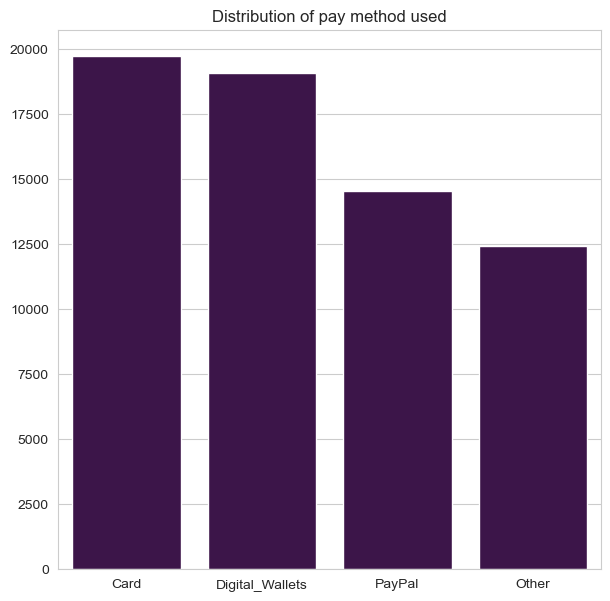

In [506]:
# create data
labels = ['Card', 'PayPal', 'Digital_Wallets', 'Other']
sizes = [Card, PayPal, Digital_Wallets, Other]

# sort the data by size in descending order
data = sorted(zip(sizes, labels), reverse=True)

# extract the sorted labels and sizes
sorted_sizes = [size for size, label in data]
sorted_labels = [label for size, label in data]

# create a bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
sns.barplot(x=sorted_labels, y=sorted_sizes, order=sorted_labels, palette=['#400D51'])
plt.title('Distribution of pay method used')
plt.show()

### <span style = "color:#2C3333"> As we can see from the Bar Chart that the most commonly used pay method by customers in this dataset is a Card.</span>

## <span style = "color:#2C3333"> Is there a correlation between the number of purchases and the time spent on the website? </span>


In [507]:
sales_clean_data.head()

,Age,Gender,Revenue_Total,Number_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent(Sec),Browser,Newsletter,Voucher,Month,Year
0,53,Male,45.3,2,22.06.21,24.915,Card,885,Chrome,not subscribed,not used,6,21
1,18,Female,36.2,3,10.12.21,2.896,PayPal,656,Chrome,not subscribed,used,12,21
2,52,Female,10.6,1,14.03.21,10.600,Digital Wallets,761,Chrome,subscribed,not used,3,21
3,29,Male,54.1,5,25.10.21,43.280,Card,906,Chrome,subscribed,not used,10,21
4,21,Female,56.9,1,14.09.21,56.900,Card,605,Chrome,subscribed,not used,9,21


In [508]:
# select the relevant columns
selected_data = sales_data[['Number_Purchases', 'Time_Spent(Sec)']]

# compute the correlation matrix
correlation_matrix = selected_data.corr()

# print the correlation matrix
print(correlation_matrix)

                  Number_Purchases  Time_Spent(Sec)
Number_Purchases          1.000000         0.001604
Time_Spent(Sec)           0.001604         1.000000


<Axes: >

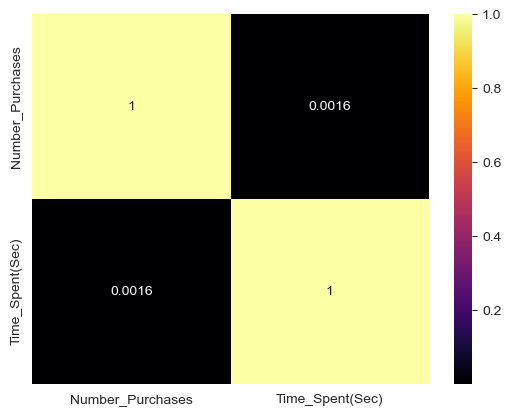

In [509]:
# Compute the correlation matrix
corr = sales_clean_data[['Number_Purchases', 'Time_Spent(Sec)']].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr, annot=True, cmap='inferno')

### <span style = "color:#2C3333"> </span>


## <span style = "color:red">
* The correlation coefficient between "Number_Purchases" and "Time_Spent(Sec)" is 0.001604.
* Since this value is very close to zero, it indicates that there is almost no correlation between the two variables.
* This means that the time spent on the website does not have a strong relationship with the number of purchases made
</span>


## <span style = "color:#2C3333"> Which month had the highest total purchase value in this dataset? </span>


In [510]:
# group the data by month and calculate the sum of the revenue for each month
monthly_revenue = sales_clean_data.groupby('Month')['Revenue_Total'].sum()

# print the monthly revenue totals
print(monthly_revenue)

Month
1     159971.4
2     138002.9
3     153033.8
4     150651.5
5     154229.4
6     149994.9
7     151661.3
8     154860.3
9     151553.3
10    155362.4
11    147957.0
12    157438.0
Name: Revenue_Total, dtype: float64


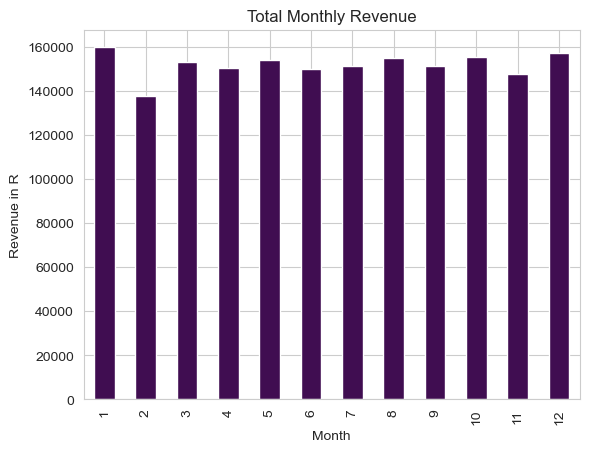

In [511]:
monthly_revenue.plot(kind='bar',color='#400D51')
plt.xlabel('Month')
plt.ylabel('Revenue in R')
plt.title('Total Monthly Revenue')
plt.show()

* The first month had the highest revenue generated(R 159 971.4), suggesting it may be a period of high demand or peak sales.
* Businesses can plan and allocate resources, such as inventory, advertising and sales promotions, during this period to maximize their revenue.
* The revenue generated in the other months is relatively consistent, ranging between R 138 002.9 to R 157 438.0.
* The consistency in revenue generated suggests that there may be a consistent level of demand throughout the year.

## <span style = "color:#2C3333">How many customers used a voucher in their purchases? </sapn>

In [512]:
not_used = 0
used = 0

for i in sales_clean_data['Voucher']:
    if(i == 'not used'):
        not_used += 1
    else:
        used += 1

print(used, "Customers used a voucher in their purchases.")

16466 Customers used a voucher in their purchases.


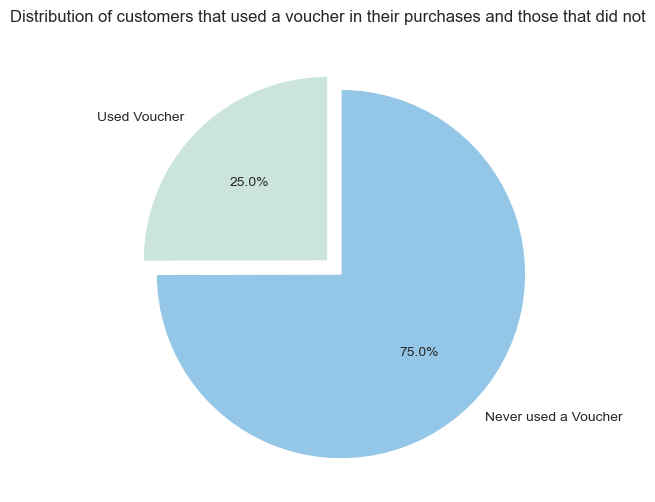

In [513]:
# create data
labels = ['Used Voucher', 'Never used a Voucher']
sizes = [used, not_used]
explode = [0, 0.1]  # explode the first slice (i.e. "Used Voucher")

# Create a pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90, colors=['#CBE4DE', '#93C6E7'])
plt.title('Distribution of customers that used a voucher in their purchases and those that did not')
plt.show()

* The majority of customers, 75%, did not use a voucher in their purchases. This suggests that customers are either not interested in vouchers or that businesses need to do more to promote the use of vouchers.
* On the other hand, 20% of customers did use a voucher, which can be seen as a positive sign for businesses as it indicates that there is some level of interest in vouchers.
* The store can tailor their marketing and promotional strategies to target customers who are more likely to be interested in vouchers or incentivize customers who have not yet tried vouchers to use them.

## <span style = "color:#2C3333">What percentage of customers subscribed to the newsletter? </sapn>

In [514]:
not_subscribed = 0
subscribed = 0

for i in sales_clean_data['Newsletter']:
    if(i == 'not subscribed'):
        not_subscribed += 1
    else:
        subscribed += 1


        
total_number_of_customers = sales_clean_data['Gender'].count()

percentage_Subscribed = (subscribed/total_number_of_customers)*100
        
print(percentage_Subscribed, "% Customers Subscribed to the Newsletter.")

15.102741808012645 % Customers Subscribed to the Newsletter.


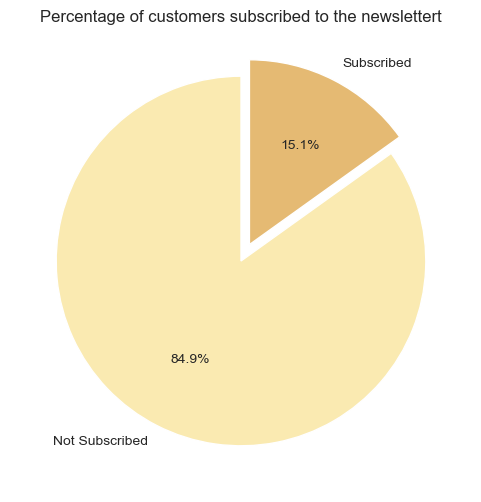

In [515]:
# create data
labels = ['Not Subscribed', 'Subscribed']
sizes = [not_subscribed, subscribed]
explode = [0, 0.1]  # explode the first slice (i.e. "Used Voucher")

# Create a pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90, colors=['#FAEAB1', '#E5BA73'])
plt.title('Percentage of customers subscribed to the newslettert')
plt.show()

## <span style = "color:#2C3333"> Which browser is most commonly used by customers in this dataset? </sapn>

In [516]:
sales_clean_data['Browser'].unique()

array(['Chrome', 'Safari', 'Other', 'Edge'], dtype=object)

Chrome    42076
Safari    13135
Other      7208
Edge       3377
Name: Browser, dtype: int64


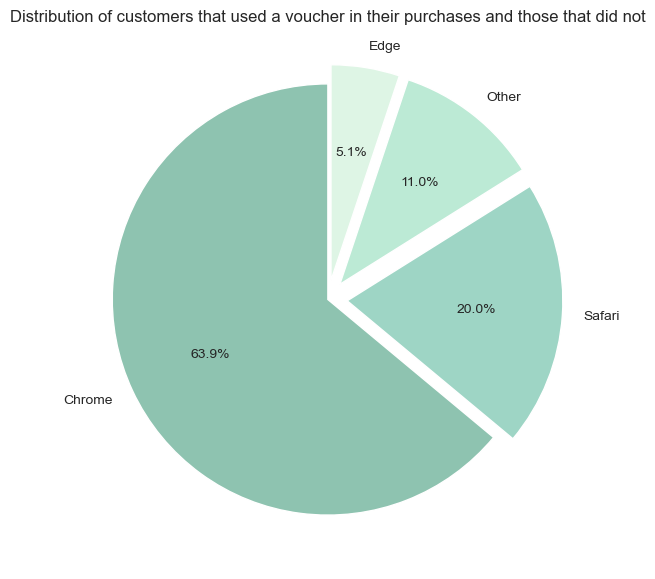

In [517]:
Chrome = 0
Safari = 0
Other = 0
Edge = 0

for i in sales_clean_data['Browser']:
    if(i == 'Chrome'):
        Chrome += 1
    elif(i == 'Safari'):
        Safari += 1
    elif(i == 'Edge'):
        Edge += 1
    else:
        Other += 1
        
# Calculate the frequency distribution of the "Browser" column
freq_dist = sales_clean_data["Browser"].value_counts()

# Print the frequency distribution
print(freq_dist)

# create data
labels = ['Chrome', 'Safari','Other', 'Edge']
sizes = [Chrome,Safari,Other,Edge]
explode = [0.0, 0.09,0.09, 0.09 ]  # explode the first slice (i.e. "Used Voucher")

# Create a pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90, colors=['#8EC3B0', '#9ED5C5','#BCEAD5', '#DEF5E5'])
plt.title('Distribution of customers that used a voucher in their purchases and those that did not')
plt.show()



* The Pie chart of the frequency distribution of the "Browser" column shows that the majority of customers use Chrome, followed by Safari, Other, and Edge, respectively.

* This insight can be useful for web developers and marketers to optimize their website for the most commonly used browsers. They can prioritize testing and optimizing their website for Chrome and Safari, as they are the most popular browsers among the customers.

* Additionally, they should also ensure that their website is functional and user-friendly on the other browsers as well, to avoid any potential loss of customers.

In [518]:
# select the relevant columns
selected_data = sales_clean_data[['Number_Purchases', 'Month', 'Year']]

# compute the correlation matrix
correlation_matrix = selected_data.corr()

# print the correlation matrix
print(correlation_matrix)

                  Number_Purchases     Month      Year
Number_Purchases          1.000000  0.001690 -0.006832
Month                     0.001690  1.000000 -0.083043
Year                     -0.006832 -0.083043  1.000000


## <span style = "color:#2C3333"> Is there a correlation between the number of purchases and the purchase date? </sapn>

<Axes: >

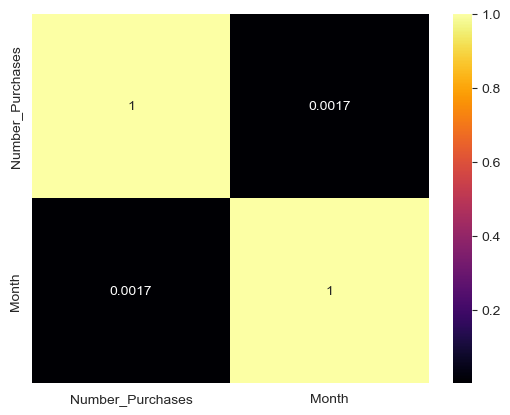

In [519]:
# Compute the correlation matrix
corr = sales_clean_data[['Number_Purchases', 'Month', ]].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr, annot=True, cmap='inferno')

* There is no correlation between the number of purchases and the purchase date.

## <span style = "color:#2C3333"> Which pay method had the highest average purchase value? </sapn>

In [520]:
pay_method_average_purchase = sales_clean_data.groupby('Pay_Method')['Purchase_VALUE'].mean().sort_values(ascending=False)
pay_method_average_purchase


Pay_Method
Card               16.028402
PayPal             15.965570
Other              15.950153
Digital Wallets    15.921330
Name: Purchase_VALUE, dtype: float64

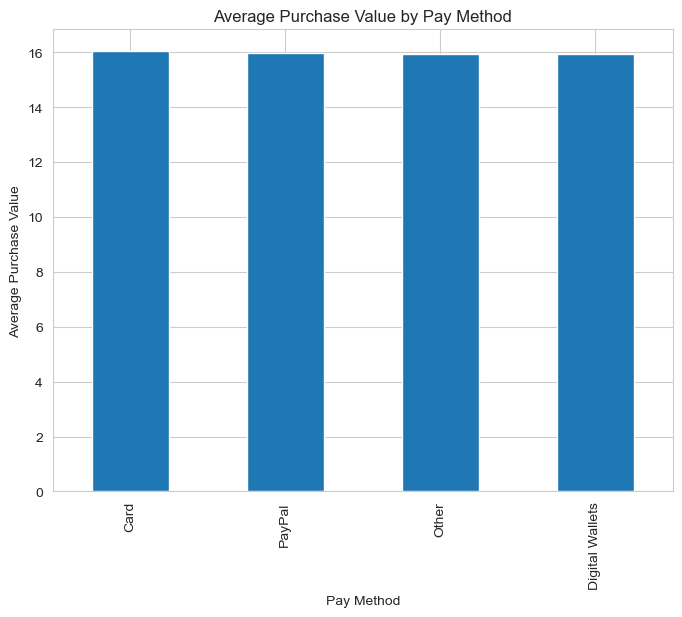

In [521]:
# Create a bar chart
plt.figure(figsize=(8,6))
pay_method_average_purchase.plot.bar()
plt.xlabel('Pay Method')
plt.ylabel('Average Purchase Value')
plt.title('Average Purchase Value by Pay Method')

plt.show()

* This shows us the average purchase value for each pay method, sorted in descending order. 
* The pay method with the highest average purchase value is Card Method.

## <span style = "color:#2C3333"> What is the most common number of purchases made by customers in this dataset? </sapn>

In [522]:
most_frequent_item = sales_clean_data['Number_Purchases'].value_counts().idxmax()
print(most_frequent_item, "is the most common number of purchases made by customers.")

1 is the most common number of purchases made by customers.


## <span style = "color:#2C3333"> How many customers used a voucher in each month of this dataset? </sapn>

In [523]:
customers_with_voucher = sales_clean_data[sales_clean_data['Voucher'] == 'used']
customers_with_voucher_by_month = customers_with_voucher.groupby(['Month', 'Voucher'])['Age'].count()
print(customers_with_voucher_by_month)


Month  Voucher
1      used       1364
2      used       1251
3      used       1354
4      used       1336
5      used       1398
6      used       1374
7      used       1355
8      used       1424
9      used       1428
10     used       1416
11     used       1348
12     used       1418
Name: Age, dtype: int64


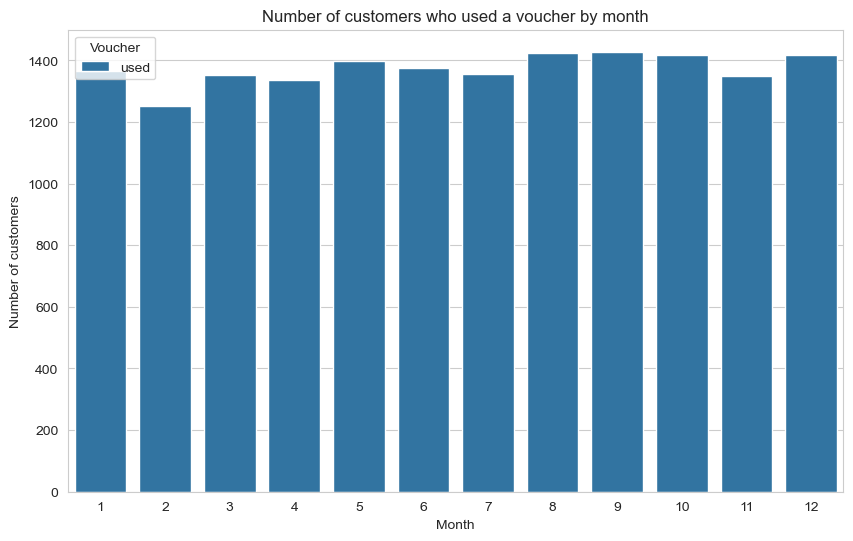

In [524]:
# Create bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x=customers_with_voucher_by_month.index.get_level_values('Month'), y='Age', hue=customers_with_voucher_by_month.index.get_level_values('Voucher'), data=customers_with_voucher_by_month.reset_index())
plt.title('Number of customers who used a voucher by month')
plt.xlabel('Month')
plt.ylabel('Number of customers')
plt.show()

## <span style = "color:#2C3333">Pie chart for the percentage of purchases made using each payment method.</span>

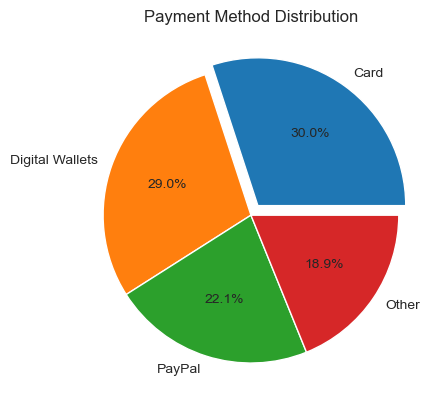

In [525]:
# Get the count of each payment method
payment_counts = sales_clean_data["Pay_Method"].value_counts()

explode = [0.08, 0,0.0, 0.0 ]
# Plot a pie chart of the payment method counts
plt.pie(payment_counts.values, explode=explode, labels=payment_counts.index, autopct='%1.1f%%')
plt.title("Payment Method Distribution")
plt.show()

* The pie chart of the percentage of purchases made using each payment method shows that the majority of customers prefer to pay using a card, with 33% of purchases made using this method. 
* Digital wallets come in second place, with 29% of purchases, followed by PayPal, which accounts for 21.1% of purchases. 
* The remaining 18.9% of purchases are made using other payment methods.
* The pie chart of payment methods used by customers can help businesses to optimize their payment options. 


## <span style = "color:#2C3333"> Age Distribution</sapn>

In [ ]:
# Create a histogram using seaborn
sns.histplot(data=sales_clean_data, x="Age", kde=True, color='#400D51')

# Set the plot title and axis labels
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Show the plot
plt.show()

* The age distribution is approximately normal, with most customers falling between the ages of 20 and 60.
* The majority of customers are in their 20s, 30s, and 40s, with a smaller number of customers in their 50s and 60s.
* There are very few customers under the age of 20 or over the age of 70.
* The age distribution may be useful for the business to better understand their target audience and tailor their marketing and product strategies accordingly.

## <span style = "color:#2C3333">Calculate the kurtosis of the Number_Purchases column</span>

In [ ]:
kurtosis = sales_clean_data['Number_Purchases'].kurtosis()

print("Kurtosis of the 'Number_Purchases' column:", kurtosis)

* The kurtosis value of -1.255 suggests that the distribution of the "Number_Purchases" column has thinner tails and a flatter peak compared to a normal distribution.
* This suggests that there is a wide range of values for the number of purchases made by customers, with some customers making many more purchases than others.

## <span style = "color:#2C3333">Based on the insights from the data set analysis, the following conclusions can be drawn:</span>

* The average revenue generated by male and female customers is very similar, with no significant difference. This suggests that both genders are equally valuable to the business in terms of generating revenue.

* Card is the most commonly used payment method by customers, followed by digital wallets and PayPal. This insight can help businesses to optimize their payment options.

* There is almost no correlation between the time spent on the website and the number of purchases made by customers. This means that the time spent on the website does not have a strong relationship with the number of purchases made.

* The first month had the highest revenue generated, suggesting it may be a period of high demand or peak sales. The revenue generated in the other months is relatively consistent, suggesting a consistent level of demand throughout the year. Businesses can plan and allocate resources during this period to maximize their revenue.

* The majority of customers did not use a voucher in their purchases. However, 20% of customers did use a voucher, indicating some level of interest in vouchers. The store can tailor their marketing and promotional strategies to target customers who are more likely to be interested in vouchers or incentivize customers who have not yet tried vouchers to use them.

* 15% of customers subscribed to the newsletter. Businesses can use this insight to optimize their email marketing strategies.

* Chrome and Safari are the most commonly used browsers by customers. Web developers and marketers can prioritize testing and optimizing their website for these browsers, while also ensuring that their website is functional and user-friendly on other browsers.

* There is no correlation between the number of purchases and the purchase date.

* The pay method with the highest average purchase value is Card Method.

* 1 is the most common number of purchases made by customers.

* The distribution of the "Number_Purchases" column has thinner tails and a flatter peak compared to a normal distribution. This suggests that there is a wide range of values for the number of purchases made by customers, with some customers making many more purchases than others.

## <span style = "color:#2C3333">Reflections </span>

* Python and Excel are both tools used for data analysis, but they have their differences. Python is a programming language that uses powerful libraries such as Pandas, Numpy, and Scipy to perform data analysis tasks, providing a wider range of statistical functions and tools for data manipulation, visualization, and modeling. 
* In contrast, Excel is a spreadsheet software that comes with built-in statistical functions for basic data analysis tasks, making it more user-friendly and accessible to non-programmers.

* Python offers greater flexibility and customization than Excel, it allowed me to write custom functions and perform complex data manipulations that are not possible with Excel. Additionally, Python can handle larger datasets than Excel as i had seen with the previous assignment when excel crashed with my data set, with python it is faster for complex calculations. However, Excel provides a visual representation of data, which is helpful for understanding and presenting data which is also possibe with python.

* The choice of tool depends on the specific task and the user's skills and preferences of which with myself going forward I'd prefer to use Python. 
* If redoing this assignment, more time would be spent exploring the data and using more advanced statistical functions in Python. Furthermore, data visualization techniques would be employed to gain deeper insights into the data. 
* To improve my programming and stats knowledge, I will read more on descriptive statistics alongside practicing more with online datasets, as practice programming regularly will then make myself feel more comfortable.